In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = list(range(X.shape[1]))  # List of all column indices

num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features)
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29])])

In [149]:
X_FULL = preprocess_pipeline.fit_transform(X)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_FULL, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [153]:
X_train.shape

(455, 30)

In [155]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape = (X_train.shape[1],)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 300)                 │           9,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,351 (161.53 KB)

 Trainable params: 41,351 (161.53 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [158]:
history = model.fit(X_train, y_train, epochs= 30, validation_data=(X_val, y_val))

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8271 - loss: 0.5060 - val_accuracy: 0.9298 - val_loss: 0.1437
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9578 - loss: 0.1225 - val_accuracy: 0.9825 - val_loss: 0.0581
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.0783 - val_accuracy: 0.9825 - val_loss: 0.0403
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0792 - val_accuracy: 0.9825 - val_loss: 0.0417
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0744 - val_accuracy: 0.9825 - val_loss: 0.0447
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9807 - loss: 0.0534 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0526 - val_accuracy: 0.9825 - val_loss: 0.0263
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.8).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.96
Precision: 1.00
Recall: 0.94
F1 Score: 0.97


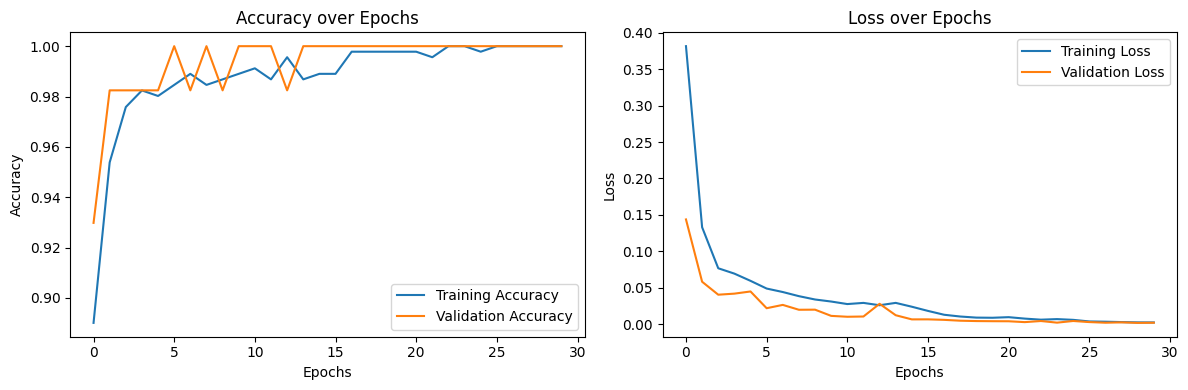

In [164]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)

y_test_pred = rf_model.predict(X_test)

print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print("Validation Precision: ", precision_score(y_val, y_val_pred))
print("Validation Recall: ", recall_score(y_val, y_val_pred))
print("Validation F1 Score: ", f1_score(y_val, y_val_pred))

print("\nTest Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Precision: ", precision_score(y_test, y_test_pred))
print("Test Recall: ", recall_score(y_test, y_test_pred))
print("Test F1 Score: ", f1_score(y_test, y_test_pred))

Validation Accuracy:  1.0
Validation Precision:  1.0
Validation Recall:  1.0
Validation F1 Score:  1.0

Test Accuracy:  0.9649122807017544
Test Precision:  0.9444444444444444
Test Recall:  1.0
Test F1 Score:  0.9714285714285714


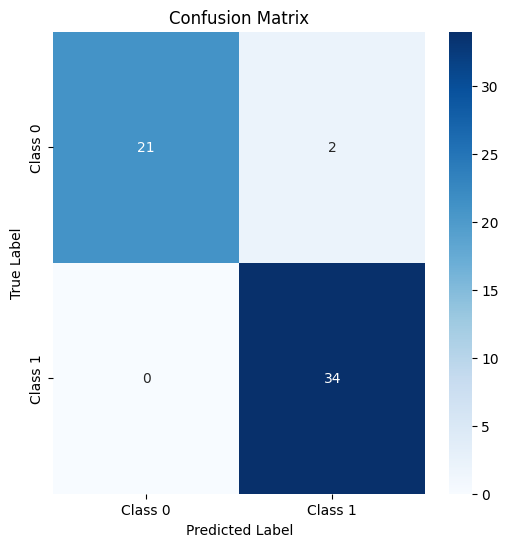

In [168]:
# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

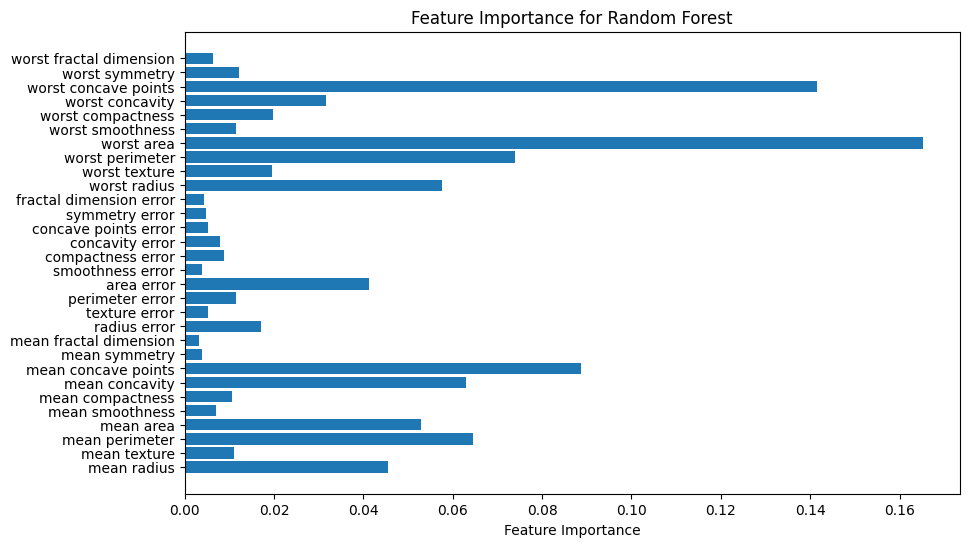

In [170]:
# Visualize Feature Importances
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), data.feature_names)  # Replace with your actual feature names
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

In [180]:
tree = rf_model.estimators_[0]

export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    filled=True,
    precision=2
)

from subprocess import call
call(['dot', '-Tpdf', 'tree.dot', '-o', 'tree.pdf'])

print("Decision Tree saved as tree.pdf")

Decision Tree saved as tree.pdf
